In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats
from pygeocoder import Geocoder

from datetime import datetime

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\NoteBooks'

In [3]:
train_data = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Train.csv')
test_data = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Test.csv')
#riders = pd.read_csv('C:\\Users\\USER\\Desktop\\ZINDI DATASETS\\Sendy Logistics Challenge\\Riders.csv')

In [4]:
print(test_data['Pickup Lat'].min())
print(test_data['Destination Lat'].max())

-1.4335118999999998
-1.0302254000000002


In [5]:
print(test_data['Pickup Long'].min())
print(test_data['Destination Long'].max())

36.6538278
37.0189577


In [6]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [7]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [8]:
x = train_data.columns
y = test_data.columns

fts = (set(x) - set(y))
fts

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [9]:
train_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [10]:
train_data['Arrival at Destination - Time'].dtype

dtype('O')

In [11]:
train_data['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [12]:
train_data['Pickup - Time'].head()

0    10:27:30 AM
1    11:44:09 AM
2    12:53:03 PM
3     9:43:06 AM
4    10:05:23 AM
Name: Pickup - Time, dtype: object

In [13]:
train_data['Arrival at Destination - Time'].head()

0    10:39:55 AM
1    12:17:22 PM
2     1:00:38 PM
3    10:05:27 AM
4    10:25:37 AM
Name: Arrival at Destination - Time, dtype: object

In [14]:
#(pd.to_datetime(train_data['Arrival at Destination - Time']) - pd.to_datetime(train_data['Arrival at Pickup - Time'])).astype('timedelta64[s]')#.dt.

In [15]:
fts

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [16]:
#train_data.drop([
#    'Arrival at Destination - Day of Month', 'Arrival at Destination - Time', 
#    'Arrival at Destination - Weekday (Mo = 1)'
#], axis=1, inplace=True)

print(train_data.shape)
test_data.shape

(21201, 29)


(7068, 25)

In [17]:
train_data.drop_duplicates(keep='first', inplace=True)
test_data.drop_duplicates(keep='first', inplace=True)

In [18]:
print(train_data.shape)
test_data.shape

(21201, 29)


(7068, 25)

In [19]:
train_data.drop('Vehicle Type', axis=1, inplace=True)
test_data.drop('Vehicle Type', axis=1, inplace=True)

In [20]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [21]:
train_data.head(4)

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341


In [22]:
train_data = train_data[train_data['Time from Pickup to Arrival']>300]

train_data.shape

(20107, 28)

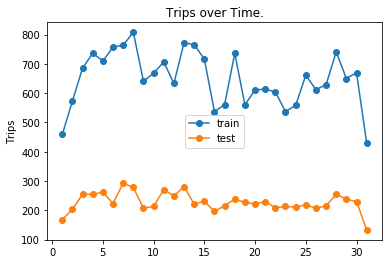

In [23]:
plt.plot(train_data.groupby('Arrival at Pickup - Day of Month').count()[['Order No']], 'o-', label='train')
plt.plot(test_data.groupby('Arrival at Pickup - Day of Month').count()[['Order No']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

In [24]:
train_orders = train_data.groupby('User Id', as_index=False)['Order No'].count().rename(columns={'Order No' : 'No_of_Orders_per_User'}).reset_index(drop=True)
test_orders = test_data.groupby('User Id', as_index=False)['Order No'].count().rename(columns={'Order No' : 'No_of_Orders_per_User'}).reset_index(drop=True)


train_data = pd.merge(train_data, train_orders, on='User Id', how='left')
test_data = pd.merge(test_data, test_orders, on='User Id', how='left')

In [25]:
#train_data.head()

In [26]:
def sort_day_of_month(day):
    
    if day in range(1, 8):
        return 'first_wk'
    elif day in range(8, 15):
        return 'second_wk'
    elif day in range(15, 22):
        return 'third_wk'
    elif day in range(22, 29):
        return 'fourth_wk'
    else:
        return 'fifth_wk'
    

train_data['Week_of_Placement'] = train_data['Placement - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Placement'] = test_data['Placement - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Confirmation'] = train_data['Confirmation - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Confirmation'] = test_data['Confirmation - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Arrival'] = train_data['Arrival at Pickup - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Arrival'] = test_data['Arrival at Pickup - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Pickup'] = train_data['Pickup - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Pickup'] = test_data['Pickup - Day of Month'].map(sort_day_of_month)

train_data['Week_of_Dest_Arr'] = train_data['Arrival at Destination - Day of Month'].map(sort_day_of_month)
test_data['Week_of_Dest_Arr'] = test_data['Arrival at Pickup - Day of Month'].map(sort_day_of_month)

In [27]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival',
       'Week_of_Pickup', 'Week_of_Dest_Arr'],
      dtype='object')

In [28]:
train_data['Placement_hour'] = pd.to_datetime(train_data['Placement - Time']).dt.hour
train_data['Placement_min'] = pd.to_datetime(train_data['Placement - Time']).dt.minute
train_data['Placement_sec'] = pd.to_datetime(train_data['Placement - Time']).dt.second

test_data['Placement_hour'] = pd.to_datetime(test_data['Placement - Time']).dt.hour
test_data['Placement_min'] = pd.to_datetime(test_data['Placement - Time']).dt.minute
test_data['Placement_sec'] = pd.to_datetime(test_data['Placement - Time']).dt.second


#--------------------

train_data['Confirmation_hour'] = pd.to_datetime(train_data['Confirmation - Time']).dt.hour
train_data['Confirmation_min'] = pd.to_datetime(train_data['Confirmation - Time']).dt.minute
train_data['Confirmation_sec'] = pd.to_datetime(train_data['Confirmation - Time']).dt.second

test_data['Confirmation_hour'] = pd.to_datetime(test_data['Confirmation - Time']).dt.hour
test_data['Confirmation_min'] = pd.to_datetime(test_data['Confirmation - Time']).dt.minute
test_data['Confirmation_sec'] = pd.to_datetime(test_data['Confirmation - Time']).dt.second


#---------------------------------


train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.minute
train_data['Arrival_sec'] = pd.to_datetime(train_data['Arrival at Pickup - Time']).dt.second

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.minute
test_data['Arrival_sec'] = pd.to_datetime(test_data['Arrival at Pickup - Time']).dt.second


#--------------------

train_data['Pickup_hour'] = pd.to_datetime(train_data['Pickup - Time']).dt.hour
train_data['Pickup_min'] = pd.to_datetime(train_data['Pickup - Time']).dt.minute
train_data['Pickup_sec'] = pd.to_datetime(train_data['Pickup - Time']).dt.second

test_data['Pickup_hour'] = pd.to_datetime(test_data['Pickup - Time']).dt.hour
test_data['Pickup_min'] = pd.to_datetime(test_data['Pickup - Time']).dt.minute
test_data['Pickup_sec'] = pd.to_datetime(test_data['Pickup - Time']).dt.second


#---------------------------------

train_data['Dest_hour'] = pd.to_datetime(train_data['Arrival at Destination - Time']).dt.hour
train_data['Dest_min'] = pd.to_datetime(train_data['Arrival at Destination - Time']).dt.minute
train_data['Dest_sec'] = pd.to_datetime(train_data['Arrival at Destination - Time']).dt.second

#test_data['Dest_hour'] = pd.to_datetime(test_data['Arrival at Destination - Time']).dt.hour
#test_data['Dest_min'] = pd.to_datetime(test_data['Arrival at Destination - Time']).dt.minute
#test_data['Dest_sec'] = pd.to_datetime(test_data['Arrival at Destination - Time']).dt.second

In [29]:
def day_period(hr):
    
    if hr in range(0, 6):
        return 'early_morning'
    elif hr in range(6, 12):
        return 'morning'
    elif hr in range(12, 16):
        return 'afternoon'
    elif hr in range(16, 20):
        return 'evening'
    else:
        return 'nighttime'
    

train_data['Placement_period'] = train_data['Placement_hour'].map(day_period)
test_data['Placement_period'] = test_data['Placement_hour'].map(day_period)

train_data['Confirmation_period'] = train_data['Confirmation_hour'].map(day_period)
test_data['Confirmation_period'] = test_data['Confirmation_hour'].map(day_period)

train_data['Arrival_period'] = train_data['Arrival_hour'].map(day_period)
test_data['Arrival_period'] = test_data['Arrival_hour'].map(day_period)

train_data['Pickup_period'] = train_data['Pickup_hour'].map(day_period)
test_data['Pickup_period'] = test_data['Pickup_hour'].map(day_period)

train_data['Dest_period'] = train_data['Dest_hour'].map(day_period)
#test_data['Dest_period'] = test_data['Dest_hour'].map(day_period)

In [30]:
def min_period(min):
    
    if min in range(0, 16):
        return 'first_quarter'
    elif min in range(16, 31):
        return 'second_quarter'
    elif min in range(31, 46):
        return 'third_quarter'
    else:
        return 'fourth_quarter'
    
    

train_data['Placement_min_period'] = train_data['Placement_min'].map(min_period)
test_data['Placement_min_period'] = test_data['Placement_min'].map(min_period)

train_data['Confirmation_min_period'] = train_data['Confirmation_min'].map(min_period)
test_data['Confirmation_min_period'] = test_data['Confirmation_min'].map(min_period)

train_data['Arrival_min_period'] = train_data['Arrival_min'].map(min_period)
test_data['Arrival_min_period'] = test_data['Arrival_min'].map(min_period)

train_data['Pickup_min_period'] = train_data['Pickup_min'].map(min_period)
test_data['Pickup_min_period'] = test_data['Pickup_min'].map(min_period)

train_data['Dest_min_period'] = train_data['Dest_min'].map(min_period)
#test_data['Pickup_min_period'] = test_data['Pickup_min'].map(min_period)

In [31]:
train_data['Placement_time_secs'] = train_data['Placement_hour']*3600 + train_data['Placement_min']*60 + train_data['Placement_sec']
test_data['Placement_time_secs'] = test_data['Placement_hour']*3600 + test_data['Placement_min']*60 + test_data['Placement_sec']

train_data['Confirmation_time_secs'] = train_data['Confirmation_hour']*3600 + train_data['Confirmation_min']*60 + train_data['Confirmation_sec']
test_data['Confirmation_time_secs'] = test_data['Confirmation_hour']*3600 + test_data['Confirmation_min']*60 + test_data['Confirmation_sec']

train_data['Arrival_time_secs'] = train_data['Arrival_hour']*3600 + train_data['Arrival_min']*60 + train_data['Arrival_sec']
test_data['Arrival_time_secs'] = test_data['Arrival_hour']*3600 + test_data['Arrival_min']*60 + test_data['Arrival_sec']

train_data['Pickup_time_secs'] = train_data['Pickup_hour']*3600 + train_data['Pickup_min']*60 + train_data['Pickup_sec']
test_data['Pickup_time_secs'] = test_data['Pickup_hour']*3600 + test_data['Pickup_min']*60 + test_data['Pickup_sec']

train_data['Dest_time_secs'] = train_data['Dest_hour']*3600 + train_data['Dest_min']*60 + train_data['Dest_sec']

train_data['Pickup_dt'] = train_data['Pickup_time_secs'] - train_data['Pickup_time_secs'].min()
test_data['Pickup_dt'] = test_data['Pickup_time_secs'] - train_data['Pickup_time_secs'].min()

In [32]:
pd.to_datetime(train_data['Pickup - Time']).head()

0   2019-10-19 10:27:30
1   2019-10-19 11:44:09
2   2019-10-19 12:53:03
3   2019-10-19 09:43:06
4   2019-10-19 10:05:23
Name: Pickup - Time, dtype: datetime64[ns]

In [33]:
#pd.to_datetime(train_data['Pickup - Time']).astype('datetime64[s]')

In [34]:
train_data.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Confirmation_min_period,Arrival_min_period,Pickup_min_period,Dest_min_period,Placement_time_secs,Confirmation_time_secs,Arrival_time_secs,Pickup_time_secs,Dest_time_secs,Pickup_dt
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,third_quarter,first_quarter,second_quarter,third_quarter,34546,34810,36287,37650,38395,11290
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,second_quarter,third_quarter,third_quarter,second_quarter,40576,41001,42022,42249,44242,15889
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,third_quarter,fourth_quarter,fourth_quarter,first_quarter,45565,45764,46174,46383,46838,20023
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,second_quarter,third_quarter,third_quarter,first_quarter,33934,33965,34676,34986,36327,8626
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,fourth_quarter,first_quarter,first_quarter,second_quarter,35718,35778,36233,36323,37537,9963


In [35]:
train_data['Confirmation - Placement'] = train_data['Confirmation_time_secs'] - train_data['Placement_time_secs']
train_data['Arrival - Confirmation'] = train_data['Arrival_time_secs'] - train_data['Confirmation_time_secs']
train_data['Pickup - Arrival'] = train_data['Pickup_time_secs'] - train_data['Pickup_time_secs']
train_data['Pickup - Confirmation'] = train_data['Pickup_time_secs'] - train_data['Confirmation_time_secs']
train_data['Pickup - Placement'] = train_data['Pickup_time_secs'] - train_data['Placement_time_secs']



test_data['Confirmation - Placement'] = test_data['Confirmation_time_secs'] - test_data['Placement_time_secs']
test_data['Arrival - Confirmation'] = test_data['Arrival_time_secs'] - test_data['Confirmation_time_secs']
test_data['Pickup - Arrival'] = test_data['Pickup_time_secs'] - test_data['Pickup_time_secs']
test_data['Pickup - Confirmation'] = test_data['Pickup_time_secs'] - test_data['Confirmation_time_secs']
test_data['Pickup - Placement'] = test_data['Pickup_time_secs'] - test_data['Placement_time_secs']

In [36]:
train_data.drop([
    'Placement_hour', 'Placement_min', 'Placement_sec', 'Confirmation_hour', 'Confirmation_min',
    'Confirmation_sec', 'Arrival_hour', 'Arrival_min', 'Arrival_sec', 'Pickup_hour', 'Pickup_min',
    'Pickup_sec'
], axis=1, inplace=True)


test_data.drop([
    'Placement_hour', 'Placement_min', 'Placement_sec', 'Confirmation_hour', 'Confirmation_min',
    'Confirmation_sec', 'Arrival_hour', 'Arrival_min', 'Arrival_sec', 'Pickup_hour', 'Pickup_min',
    'Pickup_sec'
], axis=1, inplace=True)

In [37]:
#train_data.columns

In [38]:
train_data['Cyclic_Placement_x'] = train_data['Placement_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Confirmation_x'] = train_data['Confirmation_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Arrival_x'] = train_data['Arrival_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_x'] = train_data['Pickup_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Dest_x'] = train_data['Dest_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))

train_data['Cyclic_Placement_y'] = train_data['Placement_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Confirmation_y'] = train_data['Confirmation_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Arrival_y'] = train_data['Arrival_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_y'] = train_data['Pickup_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Dest_y'] = train_data['Dest_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))


#---------------------------



test_data['Cyclic_Placement_x'] = test_data['Placement_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Confirmation_x'] = test_data['Confirmation_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Arrival_x'] = test_data['Arrival_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_x'] = test_data['Pickup_time_secs'].map(lambda x: math.sin(2*math.pi*x/86400))

test_data['Cyclic_Placement_y'] = test_data['Placement_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Confirmation_y'] = test_data['Confirmation_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Arrival_y'] = test_data['Arrival_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_y'] = test_data['Pickup_time_secs'].map(lambda x: math.cos(2*math.pi*x/86400))

In [39]:
#train_data.columns

In [40]:
train_data.drop([
    'Placement_time_secs', 'Confirmation_time_secs', 'Arrival_time_secs', 'Pickup_time_secs',
    'Dest_time_secs'
], axis=1, inplace=True)

test_data.drop([
    'Placement_time_secs', 'Confirmation_time_secs', 'Arrival_time_secs', 'Pickup_time_secs'
], axis=1, inplace=True)

In [41]:
#train_data.columns

In [42]:
train_data['Cyclic_Confirmation_Placement_x'] = train_data['Confirmation - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Arrival_Confirmation_x'] = train_data['Arrival - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Arrival_x'] = train_data['Pickup - Arrival'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Confirmation_x'] = train_data['Pickup - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Placement_x'] = train_data['Pickup - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))

train_data['Cyclic_Confirmation_Placement_y'] = train_data['Confirmation - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Arrival_Confirmation_y'] = train_data['Arrival - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Arrival_y'] = train_data['Pickup - Arrival'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Confirmation_y'] = train_data['Pickup - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
train_data['Cyclic_Pickup_Placement_y'] = train_data['Pickup - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))


#-------------------



test_data['Cyclic_Confirmation_Placement_x'] = test_data['Confirmation - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Arrival_Confirmation_x'] = test_data['Arrival - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Arrival_x'] = test_data['Pickup - Arrival'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Confirmation_x'] = test_data['Pickup - Confirmation'].map(lambda x: math.sin(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Placement_x'] = test_data['Pickup - Placement'].map(lambda x: math.sin(2*math.pi*x/86400))

test_data['Cyclic_Confirmation_Placement_y'] = test_data['Confirmation - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Arrival_Confirmation_y'] = test_data['Arrival - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Arrival_y'] = test_data['Pickup - Arrival'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Confirmation_y'] = test_data['Pickup - Confirmation'].map(lambda x: math.cos(2*math.pi*x/86400))
test_data['Cyclic_Pickup_Placement_y'] = test_data['Pickup - Placement'].map(lambda x: math.cos(2*math.pi*x/86400))

In [43]:
#train_data.columns

In [44]:
train_data.drop([
    'Confirmation - Placement', 'Arrival - Confirmation', 'Pickup - Arrival', 'Pickup - Confirmation',
    'Pickup - Placement'
], axis=1, inplace=True)


test_data.drop([
    'Confirmation - Placement', 'Arrival - Confirmation', 'Pickup - Arrival', 'Pickup - Confirmation',
    'Pickup - Placement'
], axis=1, inplace=True)

In [45]:
train_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival',
       'Week_of_Pickup', 'Week_of_Dest_Arr', 'Dest_hour', 'Dest_min',
       'Dest_sec', 'Placement_period', 'C

In [46]:
train_data = train_data.rename(columns={
    'Pickup Lat' : 'lat1', 'Pickup Long' : 'lng1', 
    'Destination Lat' : 'lat2', 'Destination Long' : 'lng2'
})

test_data = test_data.rename(columns={
    'Pickup Lat' : 'lat1', 'Pickup Long' : 'lng1', 
    'Destination Lat' : 'lat2', 'Destination Long' : 'lng2'
})

In [47]:
#A. Haversine Distance Between the Two Lat/Lons:

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train_data['Haversine_Distance'] = haversine_array(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Haversine_Distance'] = haversine_array(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [48]:
#B. Manhattan Distance Between the two Lat/Lons:

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train_data['Manhattan_Distance'] = dummy_manhattan_distance(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Manhattan_Distance'] = dummy_manhattan_distance(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [49]:
#C. Bearing Between the two Lat/Lons:

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train_data['Bearing'] = bearing_array(**train_data[['lat1', 'lng1', 'lat2', 'lng2']])
test_data['Bearing'] = bearing_array(**test_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [50]:
#D. ---- Center Latitude and Longitude between Pickup and Dropoff:

train_data.loc[:, 'center_latitude'] = (train_data['lat1'].values + train_data['lat2'].values) / 2
train_data.loc[:, 'center_longitude'] = (train_data['lng1'].values + train_data['lng2'].values) / 2


test_data.loc[:, 'center_latitude'] = (test_data['lat1'].values + test_data['lat2'].values) / 2
test_data.loc[:, 'center_longitude'] = (test_data['lng1'].values + test_data['lng2'].values) / 2

In [51]:
#E. ---X, Y, Z???


train_data['X-coord_Pickup'] = np.cos(train_data['lat1']) * np.cos(train_data['lng1'])
train_data['Y-coord-Pickup'] = np.cos(train_data['lat1']) * np.sin(train_data['lng1'])
train_data['Z-coord-Pickup'] = np.sin(train_data['lat1'])

test_data['X-coord_Pickup'] = np.cos(test_data['lat1']) * np.cos(test_data['lng1'])
test_data['Y-coord-Pickup'] = np.cos(test_data['lat1']) * np.sin(test_data['lng1'])
test_data['Z-coord-Pickup'] = np.sin(test_data['lat1'])


#------------------------------------------


train_data['X-coord_Dest.'] = np.cos(train_data['lat2']) * np.cos(train_data['lng2'])
train_data['Y-coord-Dest.'] = np.cos(train_data['lat2']) * np.sin(train_data['lng2'])
train_data['Z-coord-Dest.'] = np.sin(train_data['lat2'])

test_data['X-coord_Dest.'] = np.cos(test_data['lat2']) * np.cos(test_data['lng2'])
test_data['Y-coord-Dest.'] = np.cos(test_data['lat2']) * np.sin(test_data['lng2'])
test_data['Z-coord-Dest.'] = np.sin(test_data['lat2'])

In [52]:
#train_data.head()

In [53]:
#train_data[['Distance (KM)', 'Haversine_Distance', 'Manhattan_Distance']]

In [54]:
#F. Lat-Long

train_data['latlng1'] = train_data['lat1'] + train_data['lng1']
train_data['latlng2'] = train_data['lat2'] + train_data['lng2']


test_data['latlng1'] = test_data['lat1'] + test_data['lng1']
test_data['latlng2'] = test_data['lat2'] + test_data['lng2']

In [55]:


coords = np.vstack((train_data[['lat1', 'lng1']].values,
                    train_data[['lat2', 'lng2']].values,
                    test_data[['lat1', 'lng1']].values,
                    test_data[['lat2', 'lng2']].values))
 


In [56]:
#H. PCA

from sklearn.decomposition import PCA

pca = PCA().fit(coords)

train_data['pickup_pca0'] = pca.transform(train_data[['lat1', 'lng1']])[:, 0]
train_data['pickup_pca1'] = pca.transform(train_data[['lat1', 'lng1']])[:, 1]
train_data['dropoff_pca0'] = pca.transform(train_data[['lat2', 'lng2']])[:, 0]
train_data['dropoff_pca1'] = pca.transform(train_data[['lat2', 'lng2']])[:, 1]

test_data['pickup_pca0'] = pca.transform(test_data[['lat1', 'lng1']])[:, 0]
test_data['pickup_pca1'] = pca.transform(test_data[['lat1', 'lng1']])[:, 1]
test_data['dropoff_pca0'] = pca.transform(test_data[['lat2', 'lng2']])[:, 0]
test_data['dropoff_pca1'] = pca.transform(test_data[['lat2', 'lng2']])[:, 1]

In [57]:
#I. Speed


train_data.loc[:, 'Avg_speed'] = 1000 * train_data['Distance (KM)'] / train_data['Time from Pickup to Arrival']
train_data.loc[:, 'Avg_speed_h'] = 1000 * train_data['Haversine_Distance'] / train_data['Time from Pickup to Arrival']
train_data.loc[:, 'Avg_speed_m'] = 1000 * train_data['Manhattan_Distance'] / train_data['Time from Pickup to Arrival']

In [58]:
#J. Bin long lat

train_data['lat1_bin'] = np.round(train_data['lat1'], 2)
test_data['lat1_bin'] = np.round(test_data['lat1'], 2)

train_data['lat2_bin'] = np.round(train_data['lat2'], 2)
test_data['lat2_bin'] = np.round(test_data['lat2'], 2)

train_data['lng1_bin'] = np.round(train_data['lng1'], 2)
test_data['lng1_bin'] = np.round(test_data['lng1'], 2)

train_data['lng2_bin'] = np.round(train_data['lng2'], 2)
test_data['lng2_bin'] = np.round(test_data['lng2'], 2)

In [59]:
train_data['Temperature'] = train_data.groupby(['lat2_bin', 'lng2_bin'])['Temperature'].transform(lambda x: x.fillna(x.mean()))
test_data['Temperature'] = test_data.groupby(['lat2_bin', 'lng2_bin'])['Temperature'].transform(lambda x: x.fillna(x.mean()))#.isnull().sum()

In [60]:
print(train_data['Temperature'].mean())
print(train_data['Temperature'].std())
print(train_data['Temperature'].median())
print(train_data['Temperature'].mode())

23.22591156677312
3.2453732866520872
23.362292609351446
0    23.416351
dtype: float64


In [61]:
train_data['Temperature'] = train_data['Temperature'].fillna(train_data['Temperature'].mean())
test_data['Temperature'] = test_data['Temperature'].fillna(test_data['Temperature'].mean())

In [62]:
train_data['Precipitation in millimeters'] = train_data.groupby(['lat2_bin', 'lng2_bin'])['Precipitation in millimeters'].transform(lambda x: x.fillna(x.mean()))#.isnull().sum()
test_data['Precipitation in millimeters'] = test_data.groupby(['lat2_bin', 'lng2_bin'])['Precipitation in millimeters'].transform(lambda x: x.fillna(x.mean()))#.isnull().sum()

In [63]:
print(train_data['Precipitation in millimeters'].mean())
print(train_data['Precipitation in millimeters'].std())
print(train_data['Precipitation in millimeters'].median())
print(train_data['Precipitation in millimeters'].mode())

7.678509417904546
8.260233370896293
4.9
0    4.203846
dtype: float64


In [64]:
train_data['Precipitation in millimeters'].isnull().sum()

2680

In [65]:
train_data['Precipitation in millimeters'] = train_data['Precipitation in millimeters'].fillna(method='ffill')
test_data['Precipitation in millimeters'] = test_data['Precipitation in millimeters'].fillna(method='ffill')

((array([-3.9798986 , -3.7637987 , -3.64555277, ...,  3.64555277,
          3.7637987 ,  3.9798986 ]),
  array([ 1,  1,  1, ..., 46, 48, 49], dtype=int64)),
 (5.444614774870063, 9.701994330332722, 0.9619510103674235))

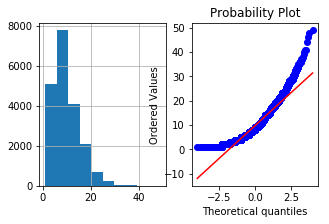

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax1 = train_data['Distance (KM)'].hist(figsize=(5, 3), ax=ax[0])

ax2 = ax[1]
stats.probplot(train_data['Distance (KM)'], plot = ax2)
#ax2.set_title('', size=18)

((array([-3.9798986 , -3.7637987 , -3.64555277, ...,  3.64555277,
          3.7637987 ,  3.9798986 ]),
  array([1.        , 1.        , 1.        , ..., 2.15056001, 2.16894354,
         2.17790642])),
 (0.18613754307609026, 1.5320545488457, 0.9956181962193866))

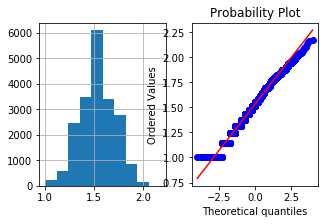

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax1 = (train_data['Distance (KM)']**(1/5)).hist(figsize=(5, 3), ax=ax[0])

ax2 = ax[1]
stats.probplot((train_data['Distance (KM)']**(1/5)), plot = ax2)
#ax2.set_title('', size=18)

In [68]:
train_data['Distance (KM)'] = train_data['Distance (KM)']**(1/5)
test_data['Distance (KM)'] = test_data['Distance (KM)']**(1/5)

In [69]:
#(test_data['Haversine_Distance']**(1/3)).hist()

train_data['Haversine_Distance'] = train_data['Haversine_Distance']**(1/3)
test_data['Haversine_Distance'] = test_data['Haversine_Distance']**(1/3)

train_data['Manhattan_Distance'] = train_data['Manhattan_Distance']**(1/3)
test_data['Manhattan_Distance'] = test_data['Manhattan_Distance']**(1/3)

In [70]:
train_data['Platform Type'] = train_data['Platform Type'].astype(str)
test_data['Platform Type'] = test_data['Platform Type'].astype(str)

In [71]:
train_data['Placement_Day_x'] = train_data['Placement - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Confirmation_Day_x'] = train_data['Confirmation - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Pickup_Day_x'] = train_data['Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Arrival_Day_x'] = train_data['Arrival at Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
train_data['Destination_Day_x'] = train_data['Arrival at Destination - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))


train_data['Placement_Day_y'] = train_data['Placement - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Confirmation_Day_y'] = train_data['Confirmation - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Pickup_Day_y'] = train_data['Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Arrival_Day_y'] = train_data['Arrival at Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
train_data['Destination_Day_y'] = train_data['Arrival at Destination - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))


#-------------------



test_data['Placement_Day_x'] = test_data['Placement - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Confirmation_Day_x'] = test_data['Confirmation - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Pickup_Day_x'] = test_data['Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))
test_data['Arrival_Day_x'] = test_data['Arrival at Pickup - Day of Month'].map(lambda x: math.sin(2*math.pi*x/31))


test_data['Placement_Day_y'] = test_data['Placement - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Confirmation_Day_y'] = test_data['Confirmation - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Pickup_Day_y'] = test_data['Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))
test_data['Arrival_Day_y'] = test_data['Arrival at Pickup - Day of Month'].map(lambda x: math.cos(2*math.pi*x/31))

In [72]:
train_data['Placement_WDay_x'] = train_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Confirmation_WDay_x'] = train_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Pickup_WDay_x'] = train_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Arrival_WDay_x'] = train_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
train_data['Destination_WDay_x'] = train_data['Arrival at Destination - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))


train_data['Placement_WDay_y'] = train_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Confirmation_WDay_y'] = train_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Pickup_WDay_y'] = train_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Arrival_WDay_y'] = train_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
train_data['Arrival_WDay_y'] = train_data['Arrival at Destination - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))


#-------------------



test_data['Placement_WDay_x'] = test_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Confirmation_WDay_x'] = test_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Pickup_WDay_x'] = test_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))
test_data['Arrival_WDay_x'] = test_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.sin(2*math.pi*x/7))


test_data['Placement_WDay_y'] = test_data['Placement - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Confirmation_WDay_y'] = test_data['Confirmation - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Pickup_WDay_y'] = test_data['Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))
test_data['Arrival_WDay_y'] = test_data['Arrival at Pickup - Weekday (Mo = 1)'].map(lambda x: math.cos(2*math.pi*x/7))

In [73]:
train_data.shape

(20107, 111)

In [74]:
#train_data.columns[-30:]

In [75]:
train_data.select_dtypes(include='object').columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id',
       'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival',
       'Week_of_Pickup', 'Week_of_Dest_Arr', 'Placement_period',
       'Confirmation_period', 'Arrival_period', 'Pickup_period', 'Dest_period',
       'Placement_min_period', 'Confirmation_min_period', 'Arrival_min_period',
       'Pickup_min_period', 'Dest_min_period'],
      dtype='object')

In [76]:
train_data.drop([
    'Order No', 'User Id', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
    'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival', 'Week_of_Pickup', 
    'Week_of_Dest_Arr', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time'
], axis=1, inplace=True)

orderNo = test_data['Order No']
test_data.drop([
    'Order No', 'User Id', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
    'Week_of_Placement', 'Week_of_Confirmation', 'Week_of_Arrival', 'Week_of_Pickup', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)'
], axis=1, inplace=True)

In [77]:
train_data.columns

Index(['Platform Type', 'Personal or Business', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'lat1', 'lng1', 'lat2', 'lng2',
       'Rider Id', 'Time from Pickup to Arrival', 'No_of_Orders_per_User',
       'Dest_hour', 'Dest_min', 'Dest_sec', 'Placement_period',
       'Confirmation_period', 'Arrival_period', 'Pickup_period', 'Dest_period',
       'Placement_min_period', 'Confirmation_min_period', 'Arrival_min_period',
       'Pickup_min_period', 'Dest_min_period', 'Pickup_dt',
       'Cyclic_Placement_x', 'Cyclic_Confirmation_x', 'Cyclic_Arrival_x',
       'Cyclic_Pickup_x', 'Cyclic_Dest_x', 'Cyclic_Placement_y',
       'Cyclic_Confirmation_y', 'Cyclic_Arrival_y', 'Cyclic_Pickup_y',
       'Cyclic_Dest_y', 'Cyclic_Confirmation_Placement_x',
       'Cyclic_Arrival_Confirmation_x', 'Cyclic_Pickup_Arrival_x',
       'Cyclic_Pickup_Confirmation_x', 'Cyclic_Pickup_Placement_x',
       'Cyclic_Confirmation_Placement_y', 'Cyclic_Arrival_Confirmation_y',
       'Cyc

In [78]:
riders = pd.read_csv('riders_modified.csv', index_col=0)
riders.head(3)

,Rider Id,Average_Rating,No_of_Ratings,Total_ratings,Trips_not_rated,No_of_riders_to_ratings,Avg_rating_bin,Avg_rating_cat,Orders_per_day
0,Rider_Id_396,14.0,1159,16226.0,1787,2.541846,14.0,excellent,1.281549
1,Rider_Id_479,13.5,176,2376.0,184,2.045455,13.0,excellent,0.377497
2,Rider_Id_648,14.3,466,6663.8,1280,3.746781,14.0,excellent,2.125457


In [79]:
train_data = pd.merge(train_data, riders, on='Rider Id', how='left')
test_data = pd.merge(test_data, riders, on='Rider Id', how='left')

In [80]:
train_riderId = train_data['Rider Id']
test_riderId = test_data['Rider Id']

train_data.drop('Rider Id', axis=1, inplace=True)
test_data.drop('Rider Id', axis=1, inplace=True)

In [81]:
train_data['Avg_rating_bin'] = train_data['Avg_rating_bin'].astype(str)
test_data['Avg_rating_bin'] = test_data['Avg_rating_bin'].astype(str)

In [82]:
train_data.select_dtypes(include='object').columns

Index(['Platform Type', 'Personal or Business', 'Placement_period',
       'Confirmation_period', 'Arrival_period', 'Pickup_period', 'Dest_period',
       'Placement_min_period', 'Confirmation_min_period', 'Arrival_min_period',
       'Pickup_min_period', 'Dest_min_period', 'Avg_rating_bin',
       'Avg_rating_cat'],
      dtype='object')

In [83]:
print(train_data.shape)
print(test_data.shape)

(20107, 96)
(7068, 83)


In [84]:
time = train_data['Time from Pickup to Arrival']

train_num = train_data.drop('Time from Pickup to Arrival', axis=1).select_dtypes(exclude='object')
test_num = test_data.select_dtypes(exclude='object')

train_cat = train_data.select_dtypes(include='object')
test_cat = test_data.select_dtypes(include='object')

train_cat['label'] = 1
test_cat['label'] = 0

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [85]:
combined = pd.concat([train_cat, test_cat], axis=0)#.reset_index(drop=True)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [86]:
combined = pd.get_dummies(combined, columns=combined.columns[:-1], drop_first=True)

train_cat = combined[combined['label']==1]
test_cat = combined[combined['label']==0]

In [87]:
train_cat.drop('label', axis=1, inplace=True)
test_cat.drop('label', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [88]:
train_data = pd.concat([train_num, train_cat, time], axis=1)
test_data = pd.concat([test_num, test_cat], axis=1)

In [89]:
train_data.head(3)

,Distance (KM),Temperature,Precipitation in millimeters,lat1,lng1,lat2,lng2,No_of_Orders_per_User,Dest_hour,Dest_min,...,Placement_period_morning,Placement_period_nighttime,Platform Type_2,Platform Type_3,Platform Type_4,Week_of_Dest_Arr_first_wk,Week_of_Dest_Arr_fourth_wk,Week_of_Dest_Arr_second_wk,Week_of_Dest_Arr_third_wk,Time from Pickup to Arrival
0,1.319508,20.400000,11.582609,-1.317755,36.830370,-1.300406,36.829741,157,10,39,...,1,0,0,1,0,0,0,0,0,745
1,1.741101,26.400000,3.487500,-1.351453,36.899315,-1.295004,36.814358,8,12,17,...,1,0,0,1,0,0,0,0,0,1993
2,1.245731,23.935125,11.582609,-1.308284,36.843419,-1.300921,36.828195,159,13,0,...,0,0,0,1,0,0,0,0,0,455


In [90]:
train_data.shape

(20107, 133)

In [91]:
test_data.shape

(7068, 121)

In [92]:
drop_fts = set(train_data.columns) - set(test_data.columns)

In [93]:
drop_fts

{'Avg_speed',
 'Avg_speed_h',
 'Avg_speed_m',
 'Cyclic_Dest_x',
 'Cyclic_Dest_y',
 'Dest_hour',
 'Dest_min',
 'Dest_sec',
 'Destination_Day_x',
 'Destination_Day_y',
 'Destination_WDay_x',
 'Time from Pickup to Arrival'}

In [94]:
train_data.drop(['Avg_speed',
                'Avg_speed_h',
 'Avg_speed_m',
 'Cyclic_Dest_x',
 'Cyclic_Dest_y',
 'Dest_hour',
 'Dest_min',
 'Dest_sec',
 'Destination_Day_x',
 'Destination_Day_y',
 'Destination_WDay_x'],
 axis=1, inplace=True)

In [95]:
train_data.shape

(20107, 122)

In [96]:
test_data.shape

(7068, 121)

In [97]:
y = train_data['Time from Pickup to Arrival']
X = train_data.drop('Time from Pickup to Arrival', axis=1)

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
#import catboost as cat
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [99]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [118]:
xgbm = xgb.XGBRegressor(
    n_estimators=250, max_depth=4, learning_rate=0.08, subsample=0.8, colsample_bytree=0.8, 
    n_jobs=-1, random_state=42
)

math.sqrt(-cross_val_score(xgbm, X_train, y_train, cv=KFold(n_splits=5), scoring='neg_mean_squared_error', n_jobs=-1).mean())

662.1415107427221

In [119]:
xgbm.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [122]:
math.sqrt(mean_squared_error(y_test, xgbm.predict(X_test)))

649.3350683361872

In [127]:
params = {
    'max_depth' : [4, 5, 6, 7, 8],
    'min_child_weight' : [2, 5, 7, 10]
}

grid = GridSearchCV(xgb.XGBRegressor(
    n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, 
    n_jobs=-1, random_state=42
), params, scoring='neg_mean_squared_error', cv=KFold(n_splits=3), n_jobs=-1)

grid.fit(X_train.values, y_train.values)

[12:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=4,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],


In [128]:
grid.best_params_, grid.best_score_

({'max_depth': 6, 'min_child_weight': 7}, -453119.5539088681)

In [133]:
params = {
    'subsample' : [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9]
}

grid = GridSearchCV(xgb.XGBRegressor(
    n_estimators=100, max_depth=6, min_child_weight=7, learning_rate=0.1, 
    subsample=0.8, colsample_bytree=0.8, 
    n_jobs=-1, random_state=42
), params, scoring='neg_mean_squared_error', cv=KFold(n_splits=3), n_jobs=-1)

grid.fit(X_train.values, y_train.values)

[13:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=7, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7,

In [134]:
grid.best_params_, grid.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, -450217.6670876967)

In [101]:
params = {
    'reg_alpha' : [0, 0.05, 0.075, 0.1, 0.15, 0.3, 0.5],
    'reg_lambda' : [0, 0.25, 0.5, 1]
}

grid = GridSearchCV(xgb.XGBRegressor(
    n_estimators=100, max_depth=6, min_child_weight=7, learning_rate=0.1, 
    subsample=0.9, colsample_bytree=0.9, 
    n_jobs=-1, random_state=42
), params, scoring='neg_mean_squared_error', cv=KFold(n_splits=3), n_jobs=-1)

grid.fit(X_train.values, y_train.values)

[16:58:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.9, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=7, missing=None,
                                    n_estimators=100, n_jobs=-1,...ead=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.9, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'reg_alpha': [0, 0.05, 0.075, 0.

In [102]:
grid.best_params_, grid.best_score_

({'reg_alpha': 0, 'reg_lambda': 1}, -450217.6670876967)

In [103]:
xgbm = xgb.XGBRegressor(
    n_estimators=250, max_depth=6, min_child_weight=7, learning_rate=0.08, 
    subsample=0.9, colsample_bytree=0.9, reg_alpha=0, reg_lambda=1,
    n_jobs=-1, random_state=42
)

In [104]:
math.sqrt(-cross_val_score(xgbm, X_train, y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=5), verbose=0).mean())

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:59:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:00:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:00:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:00:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


647.2873116424021

In [108]:
xgbm = xgb.XGBRegressor(
    n_estimators=3500, max_depth=6, min_child_weight=7, learning_rate=0.05, 
    subsample=0.9, colsample_bytree=0.9, reg_alpha=0, reg_lambda=1,
    n_jobs=-1, random_state=42
)

In [109]:
xgbm.fit(X, y)

[17:09:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=None, n_estimators=3500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [110]:
pred = xgbm.predict(test_data)

sub = pd.DataFrame({'Order No' : orderNo, 'Time from Pickup to Arrival' : pred})
sub.to_csv('xgbm.csv', index=False)

<Figure size 1008x576 with 0 Axes>

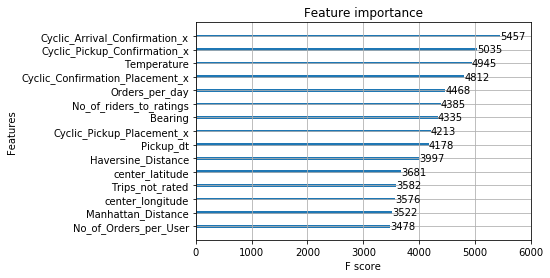

In [112]:
plt.figure(figsize=(14, 8))
xgb.plot_importance(xgbm, max_num_features=15)

In [113]:
y

0         745
1        1993
2         455
3        1341
4        1214
5        3191
6        1380
7         646
8        3398
9        3439
10       1056
11       3898
12       2642
13       2904
14        407
15       1906
16       2308
17       2639
18       1570
19       4220
20       1112
21       2124
22       1488
23       1404
24       3617
25       2606
26       1149
27       1731
28       3241
29        713
         ... 
20077    3141
20078    1091
20079    1739
20080    1136
20081    1081
20082     593
20083    3118
20084    1390
20085    1173
20086    1004
20087    1841
20088    1183
20089     666
20090    3196
20091     877
20092     701
20093     970
20094    1235
20095    1715
20096    1368
20097    2364
20098    2807
20099     971
20100    1771
20101    2298
20102    2325
20103     770
20104    2953
20105    1380
20106    2128
Name: Time from Pickup to Arrival, Length: 20107, dtype: int64